# MACD(이동평균 수렴발산)
- MACD선: EMA(9일 종가) - EMA(26일 종가)
- signal선: EMA(MACD13일)
- 제럴드 아펠이 개발.
- 인터넷에서 MACD검색 시 MACD선과 signal선이 약간 다름
- 주가의 바닥과 꼭지는 |MACD| 최대일 때.(교차할 때가 아니라, 이평선 간 거리가 가장 멀 때 최대이다)
- |MACD|가 최대인지 알기 위해 signal선과 비교. signal선과 교차할 때 |MACD|가 보통 최대
- 매도 :MACD > 0  && MACD선이 signal선 하향돌파
- 매수: MACD < 0 && MACD선이 signal선 상향돌파

sell stock:2019-02-18 price:46200
sell stock:2019-04-18 price:45600
buy stock:2019-05-23 price:43850
======before MACD:-1033.4766574572786 before signal:-914.6788687145132 today MACD:-830.7127629267561, today signal:-902.6837062561982=========
sell stock:2019-07-08 price:44400
I earn money:1050
sell stock:2019-07-18 price:46100
sell stock:2019-07-29 price:46100
buy stock:2019-08-21 price:44500
======before MACD:-691.0765818108848 before signal:-608.0539661313511 today MACD:-564.5152264959397, today signal:-601.8341461832707=========
sell stock:2019-10-02 price:47600
I earn money:2900
sell stock:2019-10-30 price:50400
sell stock:2019-11-11 price:51600
sell stock:2019-11-20 price:52000
sell stock:2020-01-06 price:55500
sell stock:2020-01-28 price:58800
sell stock:2020-02-18 price:59800
buy stock:2020-03-27 price:48300
======before MACD:-3704.124408604097 before signal:-3428.9513452363376 today MACD:-3319.9672274643526, today signal:-3413.3821855546257=========
sell stock:2020-05-12 price

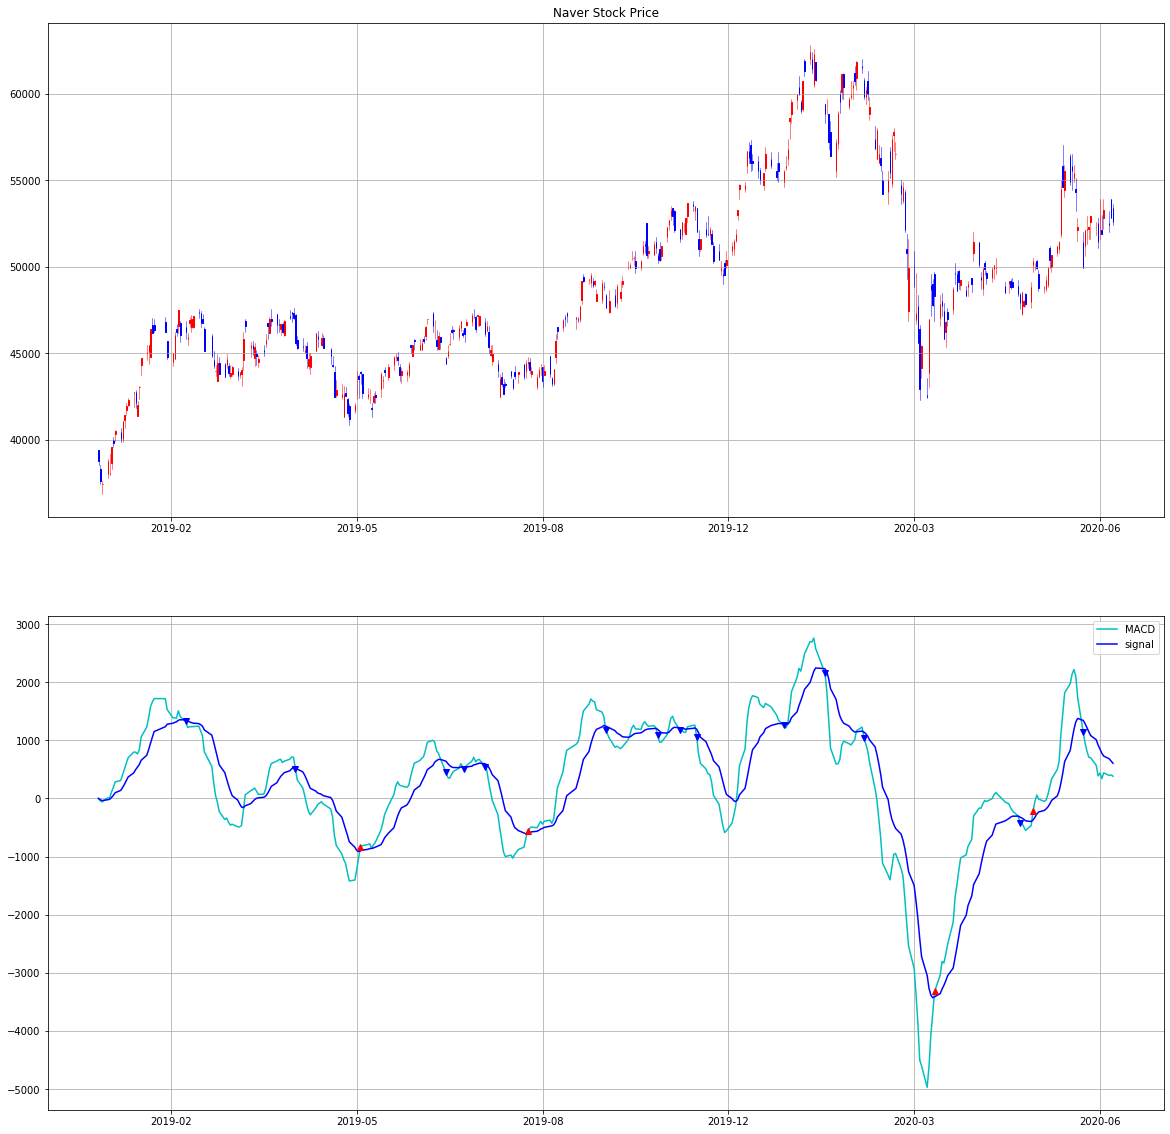

     buy_date  buy_price   sell_date  sell_price  earn  rate_of_return
0  2019-05-24      43800  2019-07-09       44850  1050        2.397260
1  2019-08-22      44500  2019-10-04       47400  2900        6.516854
2  2020-03-30      47050  2020-05-13       47250   200        0.425080
3  2020-05-20      50000  2020-06-16       51200  1200        2.400000


In [4]:
import pandas as pd
import Analyzer
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime
from mpl_finance import candlestick_ohlc
mk = Analyzer.MarketDB()
df = mk.get_daily_price('삼성전자','2019.01.01','2020-07-30')
df['EMA9'] = df['close'].ewm(span=9).mean()
df['EMA26'] = df['close'].ewm(span=26).mean()
df['MACD'] = df['EMA9'] - df['EMA26']
df['signal'] = df['MACD'].ewm(span=13).mean()
df['number'] = df.index.map(mdates.date2num)
ohlc = df[['number','open','high','low','close']]
flag = 0
buy_date=[]
buy_price=[]
sell_date=[]
sell_price=[]
plt.figure(figsize=(20,20))
p1 = plt.subplot(2,1,1)
plt.title("Naver Stock Price")
plt.grid(True)
candlestick_ohlc(p1,ohlc.values,colorup='red',colordown='blue')
p1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
p2 = plt.subplot(2,1,2)
plt.plot(df.number,df['MACD'],color='c',label='MACD')
plt.plot(df.number,df['signal'],color='b',label='signal')
for i in range(1,len(df['close'])):
    #if df['MACD'].values[i] > 0 and df['MACD'].values[i-1] > df['signal'].values[i-1] and df['MACD'].values[i] < df['signal'].values[i]:
    if df['MACD'].values[i-1] > df['signal'].values[i-1] and df['MACD'].values[i] < df['signal'].values[i]:
        plt.plot(df.number.values[i],df['MACD'].values[i],'bv')
        print("sell stock:{} price:{}".format(df['date'].values[i],df['close'].values[i]))
        if flag == 1:
            flag = 0
            sell_price.append(df['open'].values[i+1])
            sell_date.append(df['date'].values[i+1])
            sell_price_tmp = df['open'].values[i+1]
            print("I earn money:{}".format(sell_price_tmp-buy_price_tmp))
    elif df['MACD'].values[i] < 0 and df['MACD'].values[i-1] < df['signal'].values[i-1] and df['MACD'].values[i] > df['signal'].values[i]:
    #elif df['MACD'].values[i-1] < df['signal'].values[i-1] and df['MACD'].values[i] > df['signal'].values[i]:
        plt.plot(df.number.values[i],df['MACD'].values[i],'r^')
        print("buy stock:{} price:{}".format(df['date'].values[i],df['close'].values[i]))
        print("======before MACD:{} before signal:{} today MACD:{}, today signal:{}========="\
              .format(df['MACD'].values[i-1],df['signal'].values[i-1],df['MACD'].values[i],df['signal'].values[i]))
        if flag == 0:
            flag = 1
            buy_date.append(df['date'].values[i+1])
            buy_price.append(df['open'].values[i+1])
            buy_price_tmp = df['open'].values[i+1]
p2.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.grid(True)
plt.legend(loc='best')
plt.show()
trade_df=pd.DataFrame({'buy_date':buy_date, 'buy_price':buy_price, 'sell_date':sell_date, 'sell_price':sell_price})
trade_df['earn'] =  trade_df['sell_price'] - trade_df['buy_price']
trade_df['rate_of_return'] = (trade_df['sell_price'] - trade_df['buy_price'])/trade_df['buy_price']*100
print(trade_df)

# 케이엠더블유

I earn money:4650
I earn money:3950
I earn money:6050
I earn money:11300


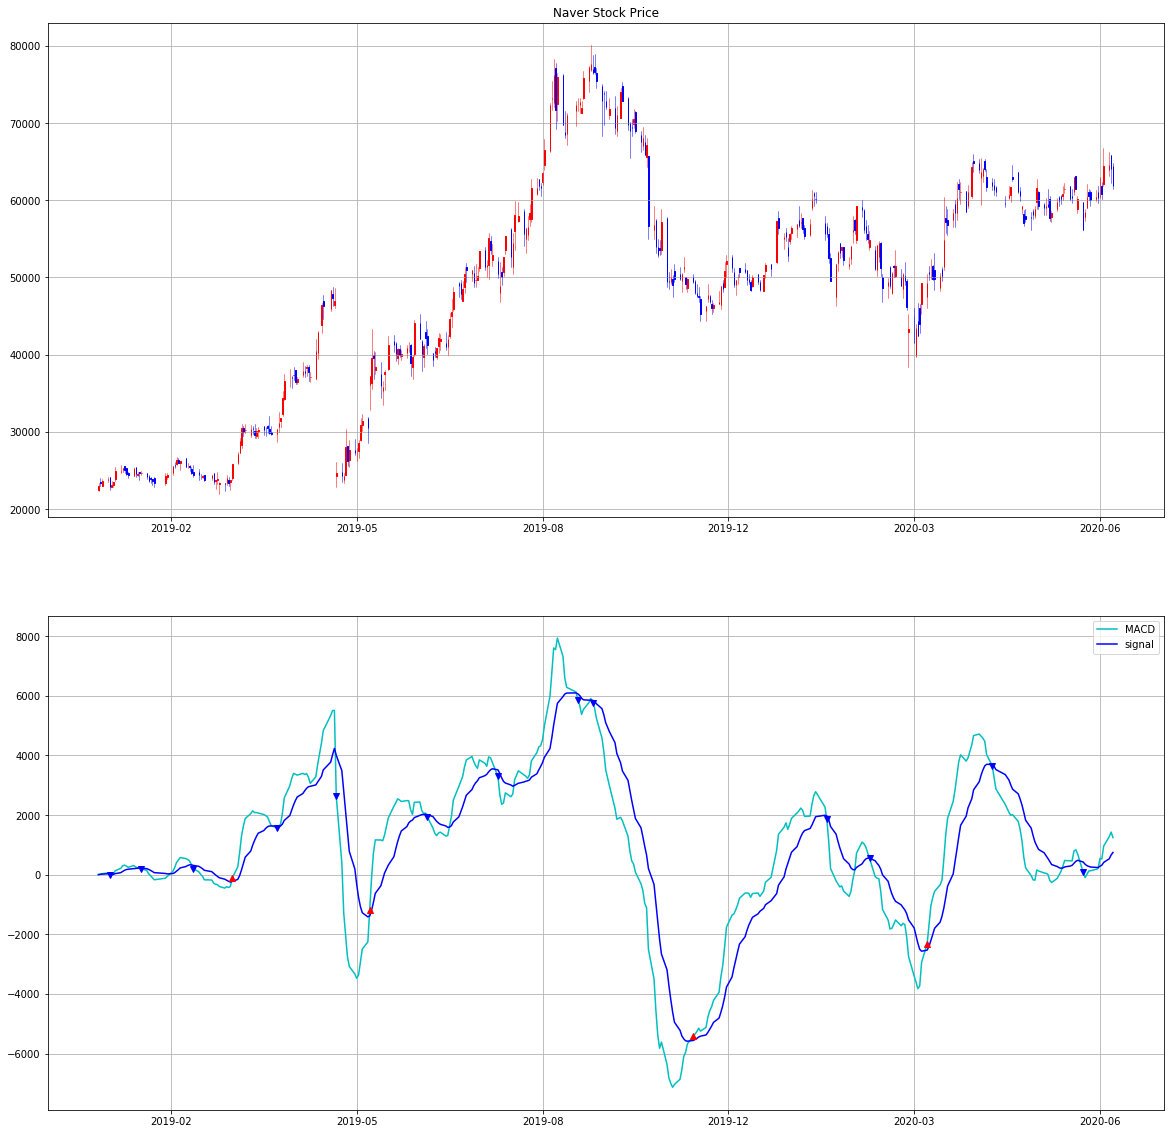

     buy_date  buy_price   sell_date  sell_price   earn  rate_of_return
0  2019-03-18      26000  2019-04-09       30650   4650       17.884615
1  2019-05-29      36300  2019-07-01       40250   3950       10.881543
2  2019-11-19      49550  2020-01-30       55600   6050       12.209889
3  2020-03-24      50700  2020-04-28       62000  11300       22.287968


In [54]:
mk = Analyzer.MarketDB()
df = mk.get_daily_price('케이엠더블유','2019.01.01','2020-07-29')
df['EMA9'] = df['close'].ewm(span=9).mean()
df['EMA26'] = df['close'].ewm(span=26).mean()
df['MACD'] = df['EMA9'] - df['EMA26']
df['signal'] = df['MACD'].ewm(span=13).mean()
df['number'] = df.index.map(mdates.date2num)
ohlc = df[['number','open','high','low','close']]
flag = 0
buy_date=[]
buy_price=[]
sell_date=[]
sell_price=[]
plt.figure(figsize=(20,20))
p1 = plt.subplot(2,1,1)
plt.title("Naver Stock Price")
plt.grid(True)
candlestick_ohlc(p1,ohlc.values,colorup='red',colordown='blue')
p1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
p2 = plt.subplot(2,1,2)
plt.plot(df.number,df['MACD'],color='c',label='MACD')
plt.plot(df.number,df['signal'],color='b',label='signal')
for i in range(1,len(df['close'])):
    #if df['MACD'].values[i] > 0 and df['MACD'].values[i-1] > df['signal'].values[i-1] and df['MACD'].values[i] < df['signal'].values[i]:
    if df['MACD'].values[i-1] > df['signal'].values[i-1] and df['MACD'].values[i] < df['signal'].values[i]:
        plt.plot(df.number.values[i],df['MACD'].values[i],'bv')
        #print("sell stock:{} price:{}".format(df['date'].values[i],df['close'].values[i]))
        if flag == 1:
            flag = 0
            sell_price.append(df['open'].values[i+1])
            sell_date.append(df['date'].values[i+1])
            sell_price_tmp = df['open'].values[i+1]
            print("I earn money:{}".format(sell_price_tmp-buy_price_tmp))
    elif df['MACD'].values[i] < 0 and df['MACD'].values[i-1] < df['signal'].values[i-1] and df['MACD'].values[i] > df['signal'].values[i]:
    #elif df['MACD'].values[i-1] < df['signal'].values[i-1] and df['MACD'].values[i] > df['signal'].values[i]:
        plt.plot(df.number.values[i],df['MACD'].values[i],'r^')
        #print("buy stock:{} price:{}".format(df['date'].values[i],df['close'].values[i]))
        #print("======before MACD:{} before signal:{} today MACD:{}, today signal:{}========="\
        #      .format(df['MACD'].values[i-1],df['signal'].values[i-1],df['MACD'].values[i],df['signal'].values[i]))
        if flag == 0:
            flag = 1
            buy_date.append(df['date'].values[i+1])
            buy_price.append(df['open'].values[i+1])
            buy_price_tmp = df['open'].values[i+1]
p2.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.grid(True)
plt.legend(loc='best')
plt.show()

trade_df=pd.DataFrame({'buy_date':buy_date, 'buy_price':buy_price, 'sell_date':sell_date, 'sell_price':sell_price})
trade_df['earn'] =  trade_df['sell_price'] - trade_df['buy_price']
trade_df['rate_of_return'] = (trade_df['sell_price'] - trade_df['buy_price'])/trade_df['buy_price']*100
print(trade_df)

# 현대일렉트릭

I earn money:1050
I earn money:2900
I earn money:200
I earn money:1200


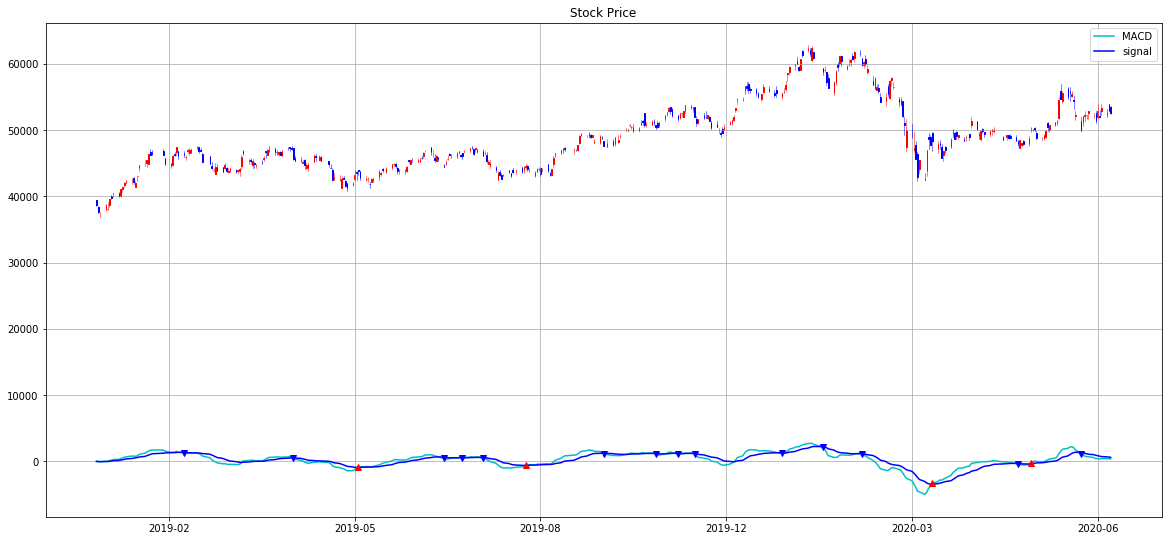

     buy_date  buy_price   sell_date  sell_price  earn  rate_of_return
0  2019-05-24      43800  2019-07-09       44850  1050        2.397260
1  2019-08-22      44500  2019-10-04       47400  2900        6.516854
2  2020-03-30      47050  2020-05-13       47250   200        0.425080
3  2020-05-20      50000  2020-06-16       51200  1200        2.400000


In [3]:
mk = Analyzer.MarketDB()
df = mk.get_daily_price('삼성전자','2019.01.01','2020-07-29')
df['EMA9'] = df['close'].ewm(span=9).mean()
df['EMA26'] = df['close'].ewm(span=26).mean()
df['MACD'] = df['EMA9'] - df['EMA26']
df['signal'] = df['MACD'].ewm(span=13).mean()
df['number'] = df.index.map(mdates.date2num)
ohlc = df[['number','open','high','low','close']]
flag = 0
buy_date=[]
buy_price=[]
sell_date=[]
sell_price=[]
plt.figure(figsize=(20,20))
p1 = plt.subplot(2,1,1)
plt.title("Stock Price")
plt.grid(True)
candlestick_ohlc(p1,ohlc.values,colorup='red',colordown='blue')
p1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
#p2 = plt.subplot(2,1,2)
plt.plot(df.number,df['MACD'],color='c',label='MACD')
plt.plot(df.number,df['signal'],color='b',label='signal')
for i in range(1,len(df['close'])):
    #if df['MACD'].values[i] > 0 and df['MACD'].values[i-1] > df['signal'].values[i-1] and df['MACD'].values[i] < df['signal'].values[i]:
    if df['MACD'].values[i-1] > df['signal'].values[i-1] and df['MACD'].values[i] < df['signal'].values[i]:
        plt.plot(df.number.values[i],df['MACD'].values[i],'bv')
        #print("sell stock:{} price:{}".format(df['date'].values[i],df['close'].values[i]))
        if flag == 1:
            flag = 0
            sell_price.append(df['open'].values[i+1])
            sell_date.append(df['date'].values[i+1])
            sell_price_tmp = df['open'].values[i+1]
            print("I earn money:{}".format(sell_price_tmp-buy_price_tmp))
    elif df['MACD'].values[i] < 0 and df['MACD'].values[i-1] < df['signal'].values[i-1] and df['MACD'].values[i] > df['signal'].values[i]:
    #elif df['MACD'].values[i-1] < df['signal'].values[i-1] and df['MACD'].values[i] > df['signal'].values[i]:
        plt.plot(df.number.values[i],df['MACD'].values[i],'r^')
        #print("buy stock:{} price:{}".format(df['date'].values[i],df['close'].values[i]))
        #print("======before MACD:{} before signal:{} today MACD:{}, today signal:{}========="\
        #      .format(df['MACD'].values[i-1],df['signal'].values[i-1],df['MACD'].values[i],df['signal'].values[i]))
        if flag == 0:
            flag = 1
            buy_date.append(df['date'].values[i+1])
            buy_price.append(df['open'].values[i+1])
            buy_price_tmp = df['open'].values[i+1]
#p2.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
plt.grid(True)
plt.legend(loc='best')
plt.show()

trade_df=pd.DataFrame({'buy_date':buy_date, 'buy_price':buy_price, 'sell_date':sell_date, 'sell_price':sell_price})
trade_df['earn'] =  trade_df['sell_price'] - trade_df['buy_price']
trade_df['rate_of_return'] = (trade_df['sell_price'] - trade_df['buy_price'])/trade_df['buy_price']*100
print(trade_df)